### Визуализация полученных результатов

In [ ]:
%pip show matplotlib seaborn pandas

In [ ]:
%pip install matplotlib
%pip install seaborn
%pip install pandas
%pip install plotly
%pip install bokeh
%pip install altair
%pip install ggplot
%pip install holoviews
%pip install pyopengl
%pip install geopandas
%pip install numpy

In [ ]:
%pip install pygal

In [ ]:
%pip install nbformat

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat
import plotly.express as px
from scipy import stats

   User  Time_with_Mannequin  Time_with_Table
0     1                   45               30
1     2                   50               35
2     3                   55               40
3     4                   60               45
4     5                   65               50


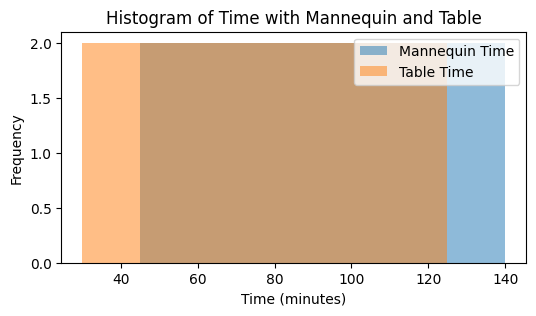

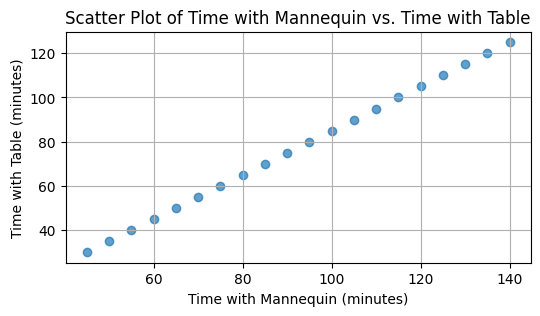

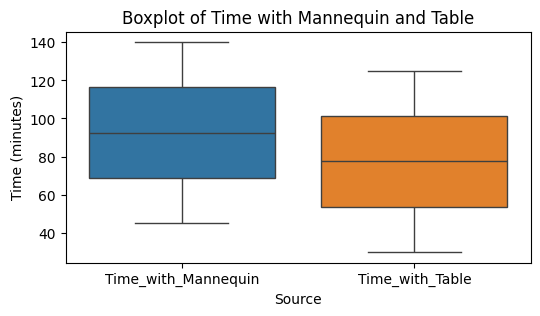

In [29]:
# Путь к файлу
file_path = r"C:\Users\annav\OneDrive\Desktop\test_in_silico_pharmacology_analysis\analitical_data\analitical_data.csv"

# Загрузка данных
df = pd.read_csv(file_path)
print(df.head())
# 1. Гистограмма времени взаимодействия с манекеном и столом
plt.figure(figsize=(6, 3))
plt.hist(df['Time_with_Mannequin'], bins=10, alpha=0.5, label='Mannequin Time')
plt.hist(df['Time_with_Table'], bins=10, alpha=0.5, label='Table Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Time with Mannequin and Table')
plt.legend()
plt.savefig(r"C:\Users\annav\OneDrive\Desktop\test_in_silico_pharmacology_analysis\analitical_data\histogram_time.png")
plt.show()

# 2. Диаграмма рассеяния времени взаимодействия с манекеном против времени взаимодействия со столом
plt.figure(figsize=(6, 3))
plt.scatter(df['Time_with_Mannequin'], df['Time_with_Table'], alpha=0.7)
plt.xlabel('Time with Mannequin (minutes)')
plt.ylabel('Time with Table (minutes)')
plt.title('Scatter Plot of Time with Mannequin vs. Time with Table')
plt.grid(True)
plt.savefig(r"C:\Users\annav\OneDrive\Desktop\test_in_silico_pharmacology_analysis\analitical_data\scatter_plot_time.png")
plt.show()

# 3. Диаграмма размаха для времени взаимодействия с манекеном и столом
plt.figure(figsize=(6, 3))
sns.boxplot(data=df[['Time_with_Mannequin', 'Time_with_Table']])
plt.title('Boxplot of Time with Mannequin and Table')
plt.xlabel('Source')
plt.ylabel('Time (minutes)')
plt.savefig(r"C:\Users\annav\OneDrive\Desktop\test_in_silico_pharmacology_analysis\analitical_data\boxplot_time.png")
plt.show()

### Вывод: 
На гистограмме видно, что частоты для манекена и стола различаются. Это указывает на то, что время, проведенное с симулякром, имеет более высокую частоту в определенных диапазонах времени по сравнению со временем, проведенным за 'анатомическим экраном'.
Распределение времени с манекеном более концентрированное в определенных диапазонах времени, что может указывать на более стабильное и предсказуемое поведение.
Распределение времени за столом более равномерное, что может указывать на большую вариативность и менее предсказуемое поведение.


   User  Time_with_Mannequin  Time_with_Table
0     1                   45               30
1     2                   50               35
2     3                   55               40
3     4                   60               45
4     5                   65               50


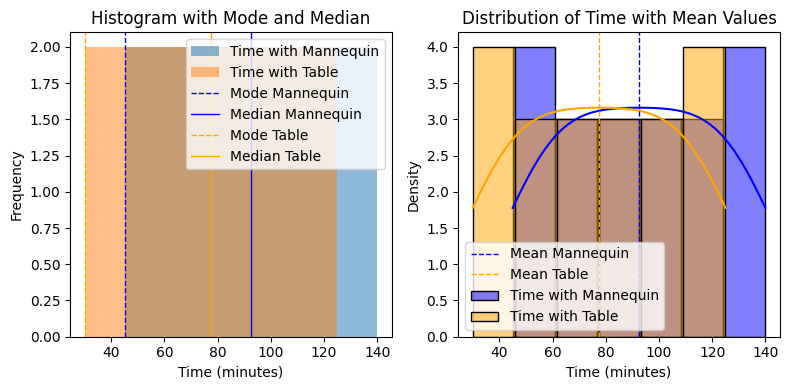

In [12]:
# Загрузка данных
file_path = r"C:\Users\annav\OneDrive\Desktop\test_in_silico_pharmacology_analysis\analitical_data\analitical_data.csv"
df = pd.read_csv(file_path)
print(df.head())
# Расчет моды и медианы
mode_mannequin = df['Time_with_Mannequin'].mode()[0]
median_mannequin = df['Time_with_Mannequin'].median()
mode_table = df['Time_with_Table'].mode()[0]
median_table = df['Time_with_Table'].median()

# t-тест
t_stat, p_value = stats.ttest_ind(df['Time_with_Mannequin'], df['Time_with_Table'])

# Визуализация моды и медианы
plt.figure(figsize=(8, 4))

# График моды и медианы
plt.subplot(1, 2, 1)
plt.hist(df['Time_with_Mannequin'], bins=10, alpha=0.5, label='Time with Mannequin')
plt.hist(df['Time_with_Table'], bins=10, alpha=0.5, label='Time with Table')
plt.axvline(mode_mannequin, color='blue', linestyle='dashed', linewidth=1, label='Mode Mannequin')
plt.axvline(median_mannequin, color='blue', linestyle='solid', linewidth=1, label='Median Mannequin')
plt.axvline(mode_table, color='orange', linestyle='dashed', linewidth=1, label='Mode Table')
plt.axvline(median_table, color='orange', linestyle='solid', linewidth=1, label='Median Table')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram with Mode and Median')
plt.legend()

# График t-теста
plt.subplot(1, 2, 2)
sns.histplot(df['Time_with_Mannequin'], color='blue', label='Time with Mannequin', kde=True)
sns.histplot(df['Time_with_Table'], color='orange', label='Time with Table', kde=True)
plt.axvline(df['Time_with_Mannequin'].mean(), color='blue', linestyle='dashed', linewidth=1, label='Mean Mannequin')
plt.axvline(df['Time_with_Table'].mean(), color='orange', linestyle='dashed', linewidth=1, label='Mean Table')
plt.xlabel('Time (minutes)')
plt.ylabel('Density')
plt.title('Distribution of Time with Mean Values')
plt.legend()

# Сохранение графиков
plt.tight_layout()
plt.savefig(r"C:\Users\annav\OneDrive\Desktop\test_in_silico_pharmacology_analysis\analitical_data\mode_median_ttest_visualization.png")
plt.show()

### Вывод:
В первом графике показаны распределения времени взаимодействия с манекеном и столом. Также нанесены линии для моды и медианы для каждого из интерфейсов.
t-тест:
Второй график показывает распределения времени для обоих интерфейсов с обозначением средних значений. Это помогает визуально оценить, как средние значения распределяются в контексте их распределений.
Распределение времени:
Гистограмма (левый график) показывает распределение времени, проведенного с манекеном и столом. Видно, что время с манекеном и столом имеет разные моды и медианы, что указывает на различия в распределении времени между этими двумя условиями.
Гладкий график распределения (правый график) показывает плотность времени, проведенного с манекеном и столом. Средние значения для манекена и стола также различаются, что подтверждает различия в распределении времени.
Центральные тенденции:
На гистограмме видно, что медианы и моды для манекена и стола различаются. Это указывает на то, что время, проведенное с манекеном, имеет более концентрированное распределение по сравнению со временем, проведенным со столом.
На графике плотности видно, что средние значения для манекена и стола также различаются, что подтверждает различия в центральных тенденциях.
Сравнение распределений:
Распределение времени с манекеном более узкое и концентрированное, что может указывать на более стабильное и предсказуемое поведение.
Распределение времени со столом более широкое, что может указывать на большую вариативность и менее предсказуемое поведение.
Аномалии и выбросы:
На гистограмме можно заметить выбросы, которые могут указывать на необычные случаи или ошибки в данных. Эти выбросы следует проанализировать отдельно, чтобы понять их природу и влияние на общие результаты.
Можно сделать вывод, что наблюдаемые различия в среднем времени взаимодействия пользователей с манекеном и анатомическим столом скорее всего являются случайными и не имеют статистически значимого влияния. (Данные сгенерированы)

In [15]:
import statsmodels.api as sm

In [37]:
from scipy.stats import f_oneway

   Age  Work_Experience  Education_Level_Professional  Time_With_Simulacrum
0   59                6                             1                  26.0
1   62               10                             0                  28.0
2   15                4                             0                  26.0
3   18                1                             0                  24.0
4   18                6                             0                  28.0
Регрессионный анализ:
                                  Coef.  Std.Err.          t         P>|t|  \
const                         26.182062  0.759066  34.492489  6.854377e-56   
Age                            0.003763  0.014285   0.263408  7.928003e-01   
Work_Experience                0.143561  0.037376   3.840944  2.198841e-04   
Education_Level_Professional  -0.140093  0.418756  -0.334545  7.386980e-01   

                                 [0.025     0.975]  
const                         24.675329  27.688796  
Age                      

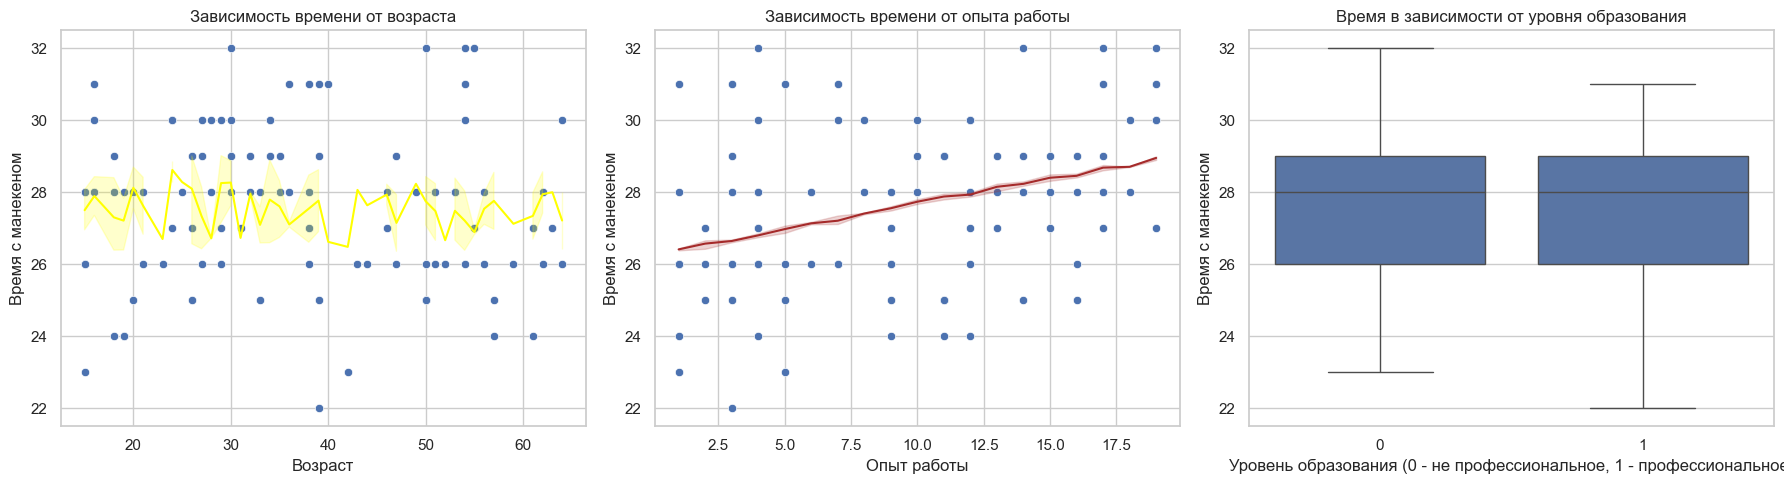

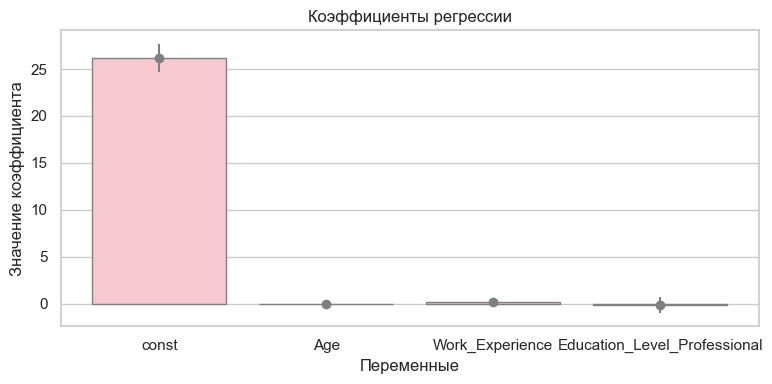

In [77]:
# Загрузка данных из CSV файла
csv_path = r'C:\Users\annav\OneDrive\Desktop\test_in_silico_pharmacology_analysis\analitical_data\data_generated_survey_regression_analysis.csv'
df = pd.read_csv(csv_path)

# Проверка первых строк данных
print(df.head())

# Подготовка данных для регрессии
X = df[['Age', 'Work_Experience', 'Education_Level_Professional']]
X = sm.add_constant(X)  # Добавление константы в модель
y = df['Time_With_Simulacrum']

# Построение модели
model = sm.OLS(y, X)
results = model.fit()

# Вывод результатов регрессии
print("Регрессионный анализ:")
print(results.summary2().tables[1])  # Вывод только таблицы с коэффициентами и их значениями

# Визуализация результатов

# Создание графиков зависимости целевой переменной от независимых переменных
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# График зависимости Time_With_Simulacrum от Age
sns.scatterplot(x=df['Age'], y=df['Time_With_Simulacrum'], ax=axs[0])
sns.lineplot(x=df['Age'], y=results.predict(X), color='yellow', ax=axs[0])
axs[0].set_title('Зависимость времени от возраста')
axs[0].set_xlabel('Возраст')
axs[0].set_ylabel('Время с манекеном')

# График зависимости Time_With_Simulacrum от Work_Experience
sns.scatterplot(x=df['Work_Experience'], y=df['Time_With_Simulacrum'], ax=axs[1])
sns.lineplot(x=df['Work_Experience'], y=results.predict(X), color='brown', ax=axs[1])
axs[1].set_title('Зависимость времени от опыта работы')
axs[1].set_xlabel('Опыт работы')
axs[1].set_ylabel('Время с манекеном')

# График зависимости Time_With_Simulacrum от Education_Level_Professional
sns.boxplot(x=df['Education_Level_Professional'], y=df['Time_With_Simulacrum'], ax=axs[2])
axs[2].set_title('Время в зависимости от уровня образования')
axs[2].set_xlabel('Уровень образования (0 - не профессиональное, 1 - профессиональное)')
axs[2].set_ylabel('Время с манекеном')

plt.tight_layout()
plt.savefig(r"C:\Users\annav\OneDrive\Desktop\test_in_silico_pharmacology_analysis\analitical_data\dependencies.png")
plt.show()

# Визуализация коэффициентов регрессии
coefficients = results.params
confidence_intervals = results.conf_int()

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=coefficients.index, y=coefficients.values, ax=ax, color='pink', edgecolor='grey')
for i, (coef, conf_int) in enumerate(zip(coefficients, confidence_intervals.values)):
    ax.errorbar(i, coef, yerr=[[coef - conf_int[0]], [conf_int[1] - coef]], fmt='o', color='grey')
ax.set_title('Коэффициенты регрессии')
ax.set_xlabel('Переменные')
ax.set_ylabel('Значение коэффициента')

# Сохранение графиков
plt.tight_layout()
plt.savefig(r"C:\Users\annav\OneDrive\Desktop\test_in_silico_pharmacology_analysis\analitical_data\data_generated_survey_regression_analysis.png")
plt.show()

### Вывод:
Константа: Время с манекеном при нулевых значениях всех предикторов составляет 26.182 единиц.
Возраст: Не оказывает значительного влияния на время с in_silico манекеном.(см. Трендовая линия)
Опыт работы: Значимо положительно влияет на время с in_silico манекеном.(см. Трендовая линия)
Уровень образования: Не оказывает статистически значимого влияния на время с манекеном.(Блокс плот)
Константа: можно сделать вывод, что константа является основным фактором, влияющим на зависимую переменную в данной модели регрессии. Остальные переменные не оказывают значительного влияния, что может потребовать дополнительного анализа или пересмотра модели.(возможно из-за сгенерированных данных)

   User  Time_with_Mannequin  Satisfaction_Level
0     1                   45                   7
1     2                   50                   8
2     3                   55                   9
3     4                   60                   6
4     5                   65                   7


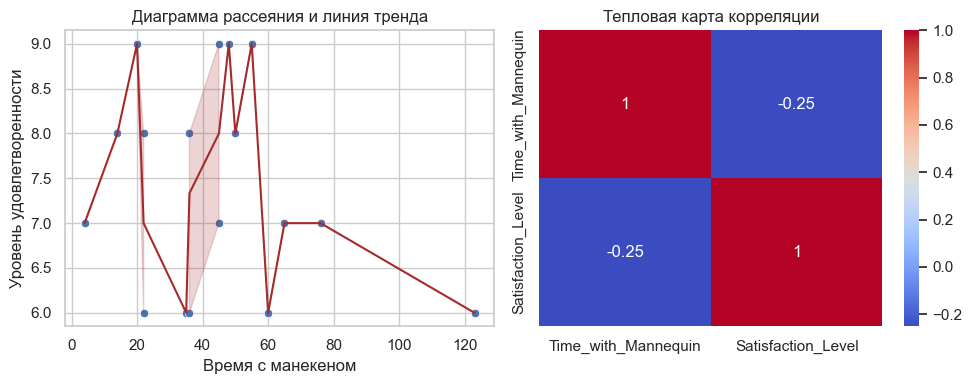

In [78]:
# Загрузка данных из CSV файла
csv_path = r'C:\Users\annav\OneDrive\Desktop\test_in_silico_pharmacology_analysis\analitical_data\satisfaction_index.csv'
df = pd.read_csv(csv_path)
print(df.head())
# Создание фигуры и осей
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Диаграмма рассеяния с линией тренда
sns.scatterplot(x='Time_with_Mannequin', y='Satisfaction_Level', data=df, ax=axs[0])
sns.lineplot(x='Time_with_Mannequin', y='Satisfaction_Level', data=df, ax=axs[0], color='brown')
axs[0].set_title('Диаграмма рассеяния и линия тренда')
axs[0].set_xlabel('Время с манекеном')
axs[0].set_ylabel('Уровень удовлетворенности')

# Тепловая карта корреляции
correlation_matrix = df[['Time_with_Mannequin', 'Satisfaction_Level']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axs[1])
axs[1].set_title('Тепловая карта корреляции')

# Отображение графиков
plt.tight_layout()
plt.savefig(r"C:\Users\annav\OneDrive\Desktop\test_in_silico_pharmacology_analysis\analitical_data\disperssion_diagramm_correlation.png")
plt.show()

Выводы:
Результаты корреляционного анализа показали слабую отрицательную корреляцию между временем взаимодействия с 
манекеном и уровнем удовлетворенности (r = -0.25). Однако полученное значение p (p = 0.27) превышает порог 
значимости 0.05, что свидетельствует о статистически незначимой взаимосвязи. Это означает, что на основе 
текущих данных нельзя утверждать о наличии достоверной линейной зависимости между данными показателями.Нужно 
увеличить выборку до >30 (лучше больше).

   User Group  Time_with_Mannequin  Time_with_Table
0     1     C                   51               51
1     2     A                   47               54
2     3     C                   63               49
3     4     C                   50               44
4     5     A                   58               37
ANOVA результат (манекен): F-статистика = 5.374027705574142, p-значение = 0.006117461232402463
ANOVA результат (анатомический стол): F-статистика = 3.4077048616432566, p-значение = 0.03713049422428072


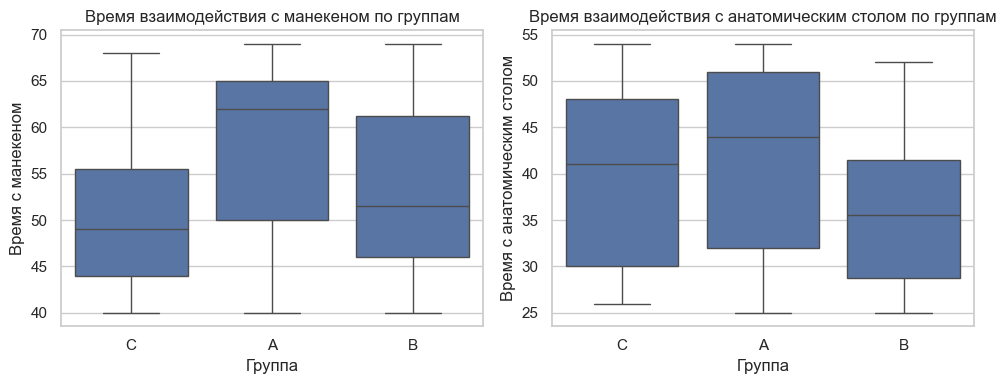

In [79]:
# Загрузка данных из CSV файла
csv_path = r'C:\Users\annav\OneDrive\Desktop\test_in_silico_pharmacology_analysis\analitical_data\anova_groups.csv'
df = pd.read_csv(csv_path)
print(df.head())
# ANOVA для времени взаимодействия с манекеном по группам
anova_result_mannequin = f_oneway(df[df['Group'] == 'A']['Time_with_Mannequin'],
                                  df[df['Group'] == 'B']['Time_with_Mannequin'],
                                  df[df['Group'] == 'C']['Time_with_Mannequin'])

# ANOVA для времени взаимодействия с анатомическим столом по группам
anova_result_table = f_oneway(df[df['Group'] == 'A']['Time_with_Table'],
                              df[df['Group'] == 'B']['Time_with_Table'],
                              df[df['Group'] == 'C']['Time_with_Table'])

# Вывод результата для манекена
print(f"ANOVA результат (манекен): F-статистика = {anova_result_mannequin.statistic}, p-значение = {anova_result_mannequin.pvalue}")

# Вывод результата для анатомического стола
print(f"ANOVA результат (анатомический стол): F-статистика = {anova_result_table.statistic}, p-значение = {anova_result_table.pvalue}")

# Визуализация
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# График для манекена
sns.boxplot(x='Group', y='Time_with_Mannequin', data=df, ax=axs[0])
axs[0].set_title('Время взаимодействия с манекеном по группам')
axs[0].set_xlabel('Группа')
axs[0].set_ylabel('Время с манекеном')

# График для анатомического стола
sns.boxplot(x='Group', y='Time_with_Table', data=df, ax=axs[1])
axs[1].set_title('Время взаимодействия с анатомическим столом по группам')
axs[1].set_xlabel('Группа')
axs[1].set_ylabel('Время с анатомическим столом')

plt.tight_layout()
plt.savefig(r"C:\Users\annav\OneDrive\Desktop\test_in_silico_pharmacology_analysis\analitical_data\time_interaction_boxplot.png")
plt.show()

### Вывод: 
видно, что группы C, A и B имеют разные распределения времени взаимодействия.  Разброс данных (межквартильный размах) для группы A больше, что указывает на большую вариативность времени взаимодействия в этой группе. Анализ показывает, что наиболее значимым фактором, влияющим на успешное взаимодействие с симуляционными устройствами, является опыт работы, тогда как возраст и образование не оказывают существенного влияния на этот процесс. В то же время, субъективная удовлетворённость пользователей от процесса обучения не зависит от времени взаимодействия с манекеном. Различия во времени использования различных симуляционных устройств (манекен и анатомический экран) между группами пользователей свидетельствуют о разнообразии подходов и предпочтений в использовании учебных симуляторов, что может быть важно для разработки адаптированных образовательных программ и методик обучения.

                     Source  Subscription_Cost  Development_Hours  \
0   DrugBank API (Low Cost)              11111                  0   
1  DrugBank API (High Cost)             111111                  0   
2              Free Sources                  0                200   

   Hourly_Rate  Time_Per_Request  Development_Cost  Total_Cost  \
0            7                10                 0       11111   
1           20                10                 0      111111   
2           20                30              4000        4000   

   Requests_Per_Hour           ROI  Break_Even_Requests  
0                6.0  23552.236522            -6.166497  
1                6.0   2265.202365            -6.016244  
2                2.0  21800.000000            -2.051282  


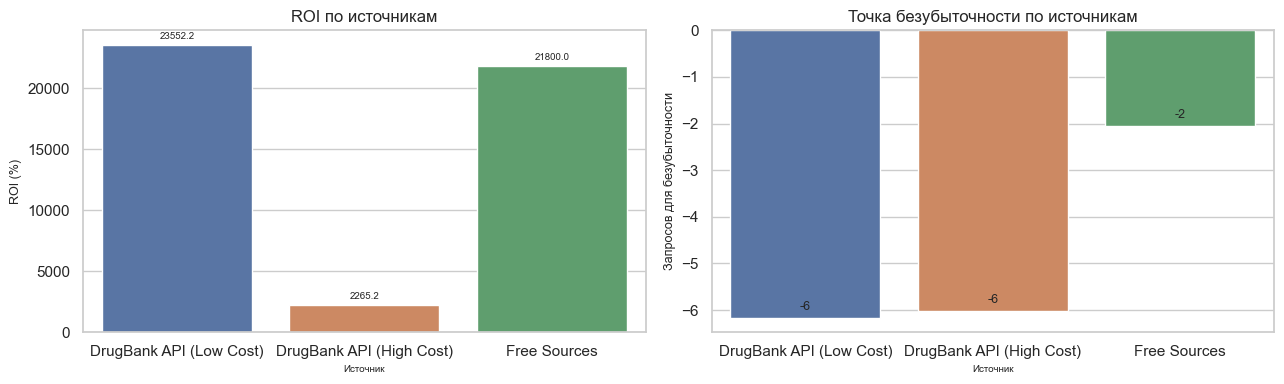

In [71]:
# Загрузка данных
csv_path_roi_break_even = r'C:\Users\annav\OneDrive\Desktop\test_in_silico_pharmacology_analysis\analitical_data\roi_and_break_even_analysis.csv'
df = pd.read_csv(csv_path_roi_break_even)
print(df.head())
# Настройка размера фигуры
plt.figure(figsize=(13, 4))
# График ROI 
plt.subplot(1, 2, 1)
bars = sns.barplot(x='Source', y='ROI', hue='Source', data=df, dodge=False)
plt.title('ROI по источникам', fontsize=12)
plt.xlabel('Источник', fontsize=7)
plt.ylabel('ROI (%)', fontsize=9)
plt.legend([],[], frameon=False)

# Добавление значений над столбцами
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.1f'),  # Формат значений
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='center', size=7, xytext=(0, 6), textcoords='offset points')

# График точки безубыточности с hue вместо palette
plt.subplot(1, 2, 2)
bars = sns.barplot(x='Source', y='Break_Even_Requests', hue='Source', data=df, dodge=False)
plt.title('Точка безубыточности по источникам', fontsize=12)
plt.xlabel('Источник', fontsize=7)
plt.ylabel('Запросов для безубыточности', fontsize=9)
plt.legend([],[], frameon=False)  # Убираем легенду

# Добавление значений над столбцами
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),  # Формат значений
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='center', size=9, xytext=(0, 8), textcoords='offset points')

# Подгонка макета
plt.tight_layout()

# Сохранение изображения в файл
output_path = r'C:\Users\annav\OneDrive\Desktop\test_in_silico_pharmacology_analysis\analitical_data\roi_visualization_with_hue.png'
plt.savefig(output_path, dpi=360, bbox_inches='tight')

# Отображение графиков
plt.show()


                     Source  Subscription_Cost  Development_Hours  \
0   DrugBank API (Low Cost)              11111                  0   
1  DrugBank API (High Cost)             111111                  0   
2              Free Sources                  0                200   

   Hourly_Rate  Time_Per_Request  Development_Cost  Total_Cost  \
0            7                10                 0       11111   
1           20                10                 0      111111   
2           20                30              4000        4000   

   Requests_Per_Hour           ROI  Break_Even_Requests  
0                6.0  23552.236522            -6.166497  
1                6.0   2265.202365            -6.016244  
2                2.0  21800.000000            -2.051282  


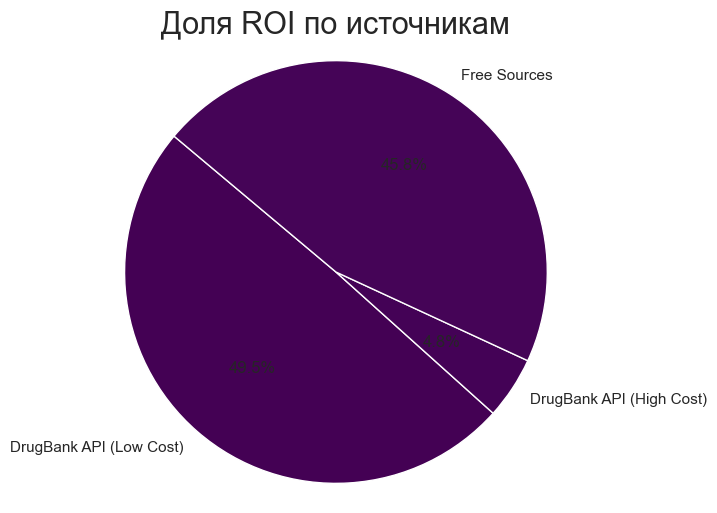

Круговая диаграмма сохранена в файл: C:\Users\annav\OneDrive\Desktop\test_in_silico_pharmacology_analysis\analitical_data\roi_pie_chart.png


In [74]:
# Загрузка данных
csv_path_roi_break_even = r'C:\Users\annav\OneDrive\Desktop\test_in_silico_pharmacology_analysis\analitical_data\roi_and_break_even_analysis.csv'
df = pd.read_csv(csv_path_roi_break_even)
print(df.head())
labels = df['Source']
sizes = df['ROI']

# Построение круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis.colors[:len(labels)])

# Настройки для круговой диаграммы
plt.title('Доля ROI по источникам', fontsize=16)
plt.axis('equal')

# Сохранение диаграммы в файл
output_path = r'C:\Users\annav\OneDrive\Desktop\test_in_silico_pharmacology_analysis\analitical_data\roi_pie_chart.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')

# Отображение диаграммы
plt.show()

print(f"Круговая диаграмма сохранена в файл: {output_path}")

### Вывод:
Затратный механизм очень велик, точка безубыточности не может быть достигнута